# Examine the effects of landscape modification

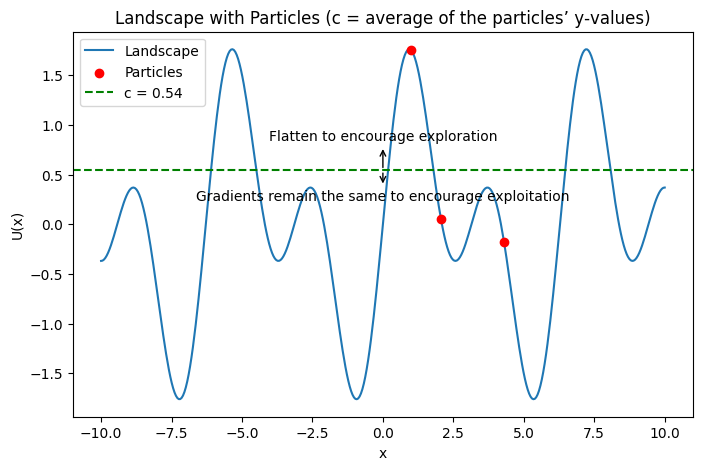

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
def U(x):
    return np.sin(x) + np.sin(2*x)

particles_x = np.round(np.random.uniform(-10,10,3),2)
particles_y = U(particles_x)

c = np.mean(particles_y)
x_vals = np.linspace(-10, 10, 400)
y_vals = U(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Landscape')
plt.scatter(particles_x, particles_y, color='red', zorder=5, label='Particles')
plt.axhline(c, color='green', linestyle='--', label=f'c = {c:.2f}')


plt.annotate("Flatten to encourage exploration",
             xy=(0, c), xytext=(0, c + 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='<-'),
             horizontalalignment='center')

plt.annotate("Gradients remain the same to encourage exploitation",
             xy=(0, c), xytext=(0, c - 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='<-'),
             horizontalalignment='center')

plt.title("Landscape with Particles (c = average of the particles’ values)")
plt.xlabel("x")
plt.ylabel("U(x)")
plt.legend()
plt.show()


## New landscape after applying landscape modification

Reference: Ioana's IASKA - Examining parameter significance 

In [57]:
#U(x) <= c:
def H_less(U, u_min, c, eps, x):
    return (1/eps)*(U(x) - u_min)
# else:
def H_more(U, u_min, c, eps, x):
    return (1/eps)*(c-u_min) + np.log(((U(x) - c) + eps)/eps)

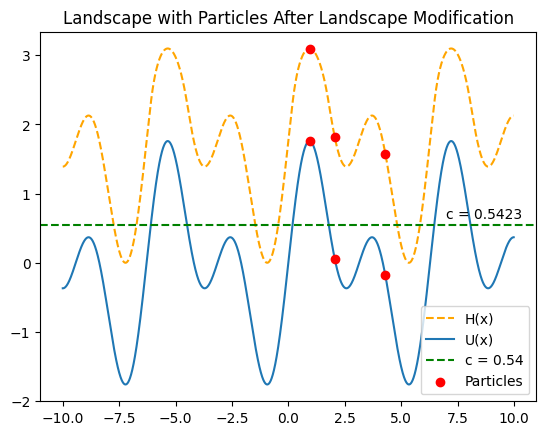

In [76]:
eps = 1

inputs = np.arange(-10, 10, 0.01)
results = U(inputs)
u_min = min(results)
u_max = max(results)
mapping = dict()

results_H = []
for elem in inputs:
    if U(elem) <= c:
        res = H_less(U, u_min, c, eps, elem)
        mapping[round(elem,2)] = res
        results_H.append(res)
    else:
        res = H_more(U, u_min, c, eps, elem)
        mapping[round(elem,2)] = res
        results_H.append(res)

particles_y_H = [mapping[i] for i in particles_x]

plt.plot(inputs, results_H, ls = '--', color = 'orange', label = "H(x)")
plt.plot(inputs,results, label = "U(x)")
plt.axhline(c, color='green', linestyle='--', label=f'c = {c:.2f}')
plt.annotate(f"c = {round(c,4)}",xy=(7,c+0.1))
plt.scatter(particles_x, particles_y_H, color='red', zorder=5, label='Particles')
plt.scatter(particles_x, particles_y, color='red', zorder=5)
plt.title("Landscape with Particles After Landscape Modification")
plt.legend()
plt.show()